<a href="https://colab.research.google.com/github/VictorSairam/CNN_Data_Augmentation_Flower_Classification/blob/main/Transfer_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow_hub as hub

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
IMAGE_SHAPE = (224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape = IMAGE_SHAPE+(3,))
])

In [11]:
from google.colab import files
data_to_upload = files.upload()

Saving ImageNetLabels.txt to ImageNetLabels.txt
Saving gold_fish.jpeg to gold_fish (1).jpeg


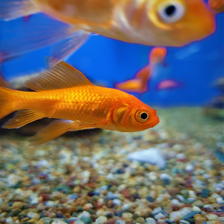

In [12]:
gold_fish = Image.open("gold_fish.jpeg").resize(IMAGE_SHAPE)
gold_fish

In [13]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [14]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [15]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 0s 19ms/step


(1, 1001)

In [8]:
result

array([[ 0.20839232,  2.1663496 ,  9.69556   , ..., -1.5079267 ,
         0.02160262,  0.4206633 ]], dtype=float32)

In [16]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [18]:
with open("ImageNetLabels.txt", "r") as f:
  image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [19]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 1s 0us/step


In [20]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [21]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*.jpg')),
    'daisy' : list(data_dir.glob('daisy/*.jpg')),
    'dandelion' : list(data_dir.glob('dandelion/*.jpg')),
    'sunflowers' : list(data_dir.glob('sunflowers/*.jpg')),
    'tulips' : list(data_dir.glob('tulips/*.jpg'))
}

In [22]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4,
}

In [23]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(333, 500, 3)

In [24]:
cv2.resize(img, IMAGE_SHAPE).shape

(224, 224, 3)

In [32]:
x, y = [], []
for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,IMAGE_SHAPE)
    x.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [33]:
x = np.array(x)
y = np.array(y)

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [35]:
x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

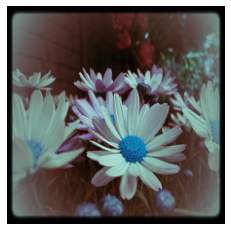

In [44]:
plt.axis('off')
plt.imshow(x[795])

In [39]:
predicted = classifier.predict(np.array([x[0],x[1],x[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 0s 36ms/step


array([795, 795, 722])

In [42]:
image_labels[722]

'pillow'

In [46]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape = (224, 224, 3), trainable=False
)

In [48]:
num_of_flowers = 5

model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [52]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

model.fit(x_train_scaled, y_train, epochs = 5)

Epoch 1/5
86/86 [==============================] - 7s 42ms/step - loss: 0.8529 - accuracy: 0.6770
Epoch 2/5
86/86 [==============================] - 4s 42ms/step - loss: 0.4337 - accuracy: 0.8485
Epoch 3/5
86/86 [==============================] - 4s 42ms/step - loss: 0.3387 - accuracy: 0.8812
Epoch 4/5
86/86 [==============================] - 4s 42ms/step - loss: 0.2826 - accuracy: 0.9095
Epoch 5/5
86/86 [==============================] - 4s 42ms/step - loss: 0.2383 - accuracy: 0.9277
